In [27]:
import numpy as np
import pandas as pd
from matplotlib  import pyplot as plt


In [28]:
cdata = pd.read_csv('cdata.csv')
selected_data = cdata.loc[:, ['x', 'y']]
xy = selected_data.to_numpy()

隨機取四個centroids

In [29]:
def random_choose(xy, i):
    random_permutation = np.random.permutation(xy.shape[0])
    selected_rows = xy[random_permutation[:i]]
    return selected_rows

分出最近的群

In [30]:
def close_cluster(xy, selected_rows):
    K = len(selected_rows)  
    distances = np.zeros((K, len(xy)))

    # 算距離
    for k in range(K):
        for i in range(len(xy)):
            distances[k, i] = np.sqrt((xy[i][0] - selected_rows[k][0])**2 + (xy[i][1] - selected_rows[k][1])**2)

    # 找出最離群最小的點
    min_indices = np.argmin(distances, axis=0)
    # 分群
    clusters = {k: [] for k in range(K)}
    for i, cluster_idx in enumerate(min_indices):
        clusters[cluster_idx].append(xy[i])

    return clusters

畫圖

In [31]:
def draw_plot(clusters, selected_rows, i):
    colors = ['r', 'g', 'b', 'y']  # 用不同的颜色表示不同的群
    plt.figure(figsize=(8, 6))

    for cluster_idx, points in clusters.items():
        points = np.array(points)  # 轉為numpy方便繪製
        plt.scatter(points[:, 0], points[:, 1], color=colors[cluster_idx], label=f'Cluster {cluster_idx}', alpha=0.6)

    # 畫centroid
    plt.scatter(selected_rows[:, 0], selected_rows[:, 1], color='k', marker='x', s=100, label='Centers')

    plt.legend()   # 圖例
    plt.title(f'Round {i}')
    plt.xlabel('X')
    plt.ylabel('Y')

    plt.show()

更改中心點

In [32]:
def change_centroid(clusters, selected_rows):
    new_centroids = np.zeros((len(selected_rows), 2))  
    
    for cluster_idx in range(len(clusters)):
        cluster_points = clusters[cluster_idx]
        if len(cluster_points) == 0:
            continue  # 如果群為空繼續

        cluster_points = np.array(cluster_points)

        new_centroid_x = np.mean(cluster_points[:, 0])
        new_centroid_y = np.mean(cluster_points[:, 1])
        
        # 儲存新質心
        new_centroids[cluster_idx] = [new_centroid_x, new_centroid_y]

    return new_centroids


(1)

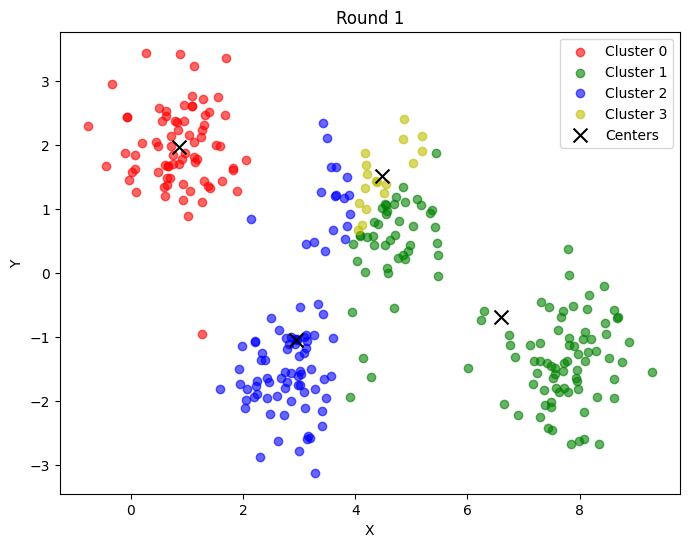

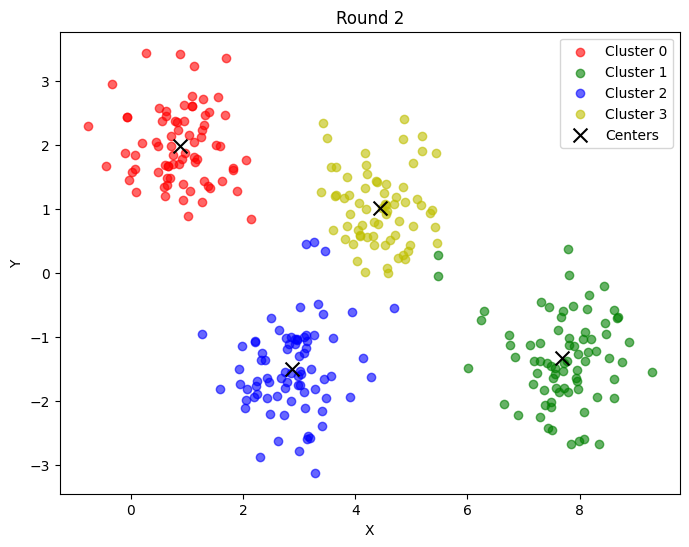

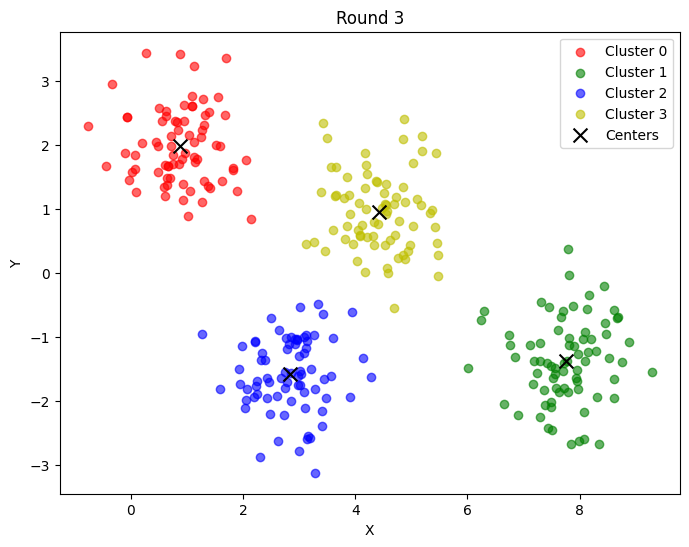

In [33]:
selected_rows = random_choose(xy, 4)
clusters = close_cluster(xy, selected_rows)
new_centroids = change_centroid(clusters, selected_rows)
draw_plot(clusters, new_centroids, 1)
old_centroids = new_centroids
i = 2
continue_or_not = True
while continue_or_not == True:
    clusters = close_cluster(xy, old_centroids)
    new_centroids = change_centroid(clusters, selected_rows)
    draw_plot(clusters, new_centroids, i)
    i += 1
    if np.all(np.abs(new_centroids - old_centroids)) < 1e-5:
        continue_or_not = False
    old_centroids = new_centroids


計算SSE

In [34]:
def calculate_sse(clusters, centroids):
    sse = 0
    for cluster_idx, points in clusters.items():
        points = np.array(points)
        if len(points) == 0:  # 若為空群跳過
            continue
        # 計算該群中每個點到centroid的距離平方，並累加到 sse 中
        sse += np.sum((points - centroids[cluster_idx])**2)
    return sse

畫折線圖

In [35]:
def plot_sse_vs_k(k_values, sse_values):
    
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, sse_values)
    plt.xlabel('Number of K')
    plt.ylabel('SSE')
    plt.show()


(2)

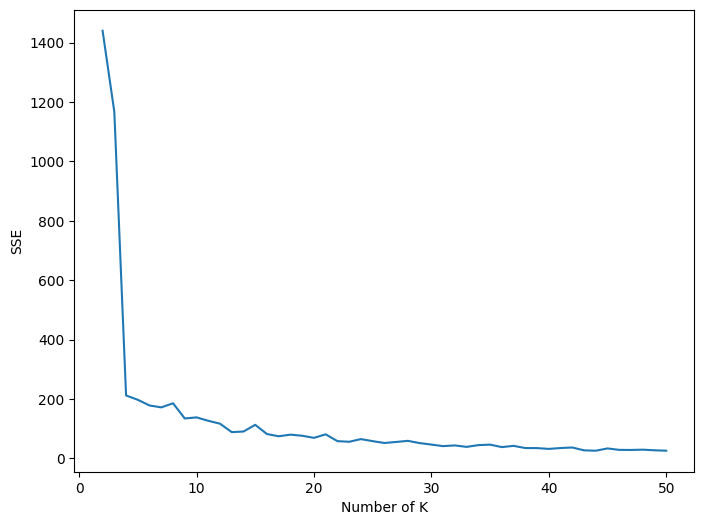

In [40]:
sse_values = []
j = 2
while j <= 50:
    changing_k = random_choose(xy, j)
    selected_rows = changing_k

    clusters = close_cluster(xy, selected_rows)
    new_centroids = change_centroid(clusters, selected_rows)
    old_centroids = new_centroids

    i = 2
    continue_or_not = True
    while continue_or_not == True:
        clusters = close_cluster(xy, old_centroids)
        new_centroids = change_centroid(clusters, selected_rows)
        i += 1
        if np.all(np.abs(new_centroids - old_centroids)) < 1e-5:
            continue_or_not = False
        old_centroids = new_centroids
    
    sse_value = calculate_sse(clusters, new_centroids)
    sse_values.append(sse_value)
    j += 1

k_values = range(2, j)  
plot_sse_vs_k(k_values, sse_values)

畫長條圖

In [37]:
def plot_random_k(sse_values):
    plt.figure(figsize=(8, 6))
    plt.bar(range(0, 10), sse_values)
    plt.title('Result of 10 times randomly pick the initial points')
    plt.xlabel('Fixed k = 10')
    plt.ylabel('SSE')
    plt.ylim(100, 180)

(3)

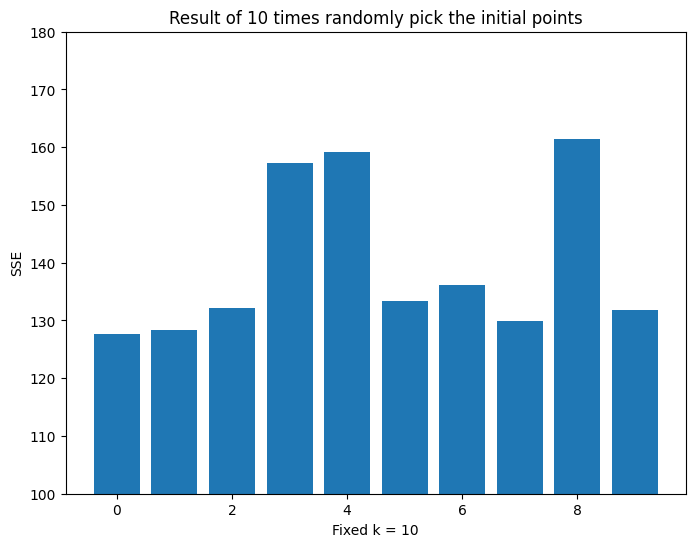

In [38]:
sse_values = []
k = 0
while k < 10:
    selected_rows = random_choose(xy, 10)
    clusters = close_cluster(xy, selected_rows)
    new_centroids = change_centroid(clusters, selected_rows)
    old_centroids = new_centroids
    i = 2
    continue_or_not = True
    while continue_or_not == True:
        clusters = close_cluster(xy, old_centroids)
        new_centroids = change_centroid(clusters, selected_rows)
        i += 1
        if np.all(np.abs(new_centroids - old_centroids)) < 1e-5:
            continue_or_not = False
        old_centroids = new_centroids

    sse_value = calculate_sse(clusters, new_centroids)
    sse_values.append(sse_value)
    k += 1
plot_random_k(sse_values)